# Flight Price Prediction

In [60]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

In [61]:
# Loading the dataset
df = pd.read_excel('../Dataset/FlightPrice.xlsx')

In [62]:
# Displaying the first few rows of the dataset
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [63]:
# Checking the shape of the dataset
df.shape

(13354, 11)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [65]:
# Checking for missing values
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [66]:
# Dropping rows with missing values
df.dropna(inplace=True)

In [67]:
# Displaying information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Date_of_Journey  10682 non-null  object 
 2   Source           10682 non-null  object 
 3   Destination      10682 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10682 non-null  object 
 6   Arrival_Time     10682 non-null  object 
 7   Duration         10682 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10682 non-null  object 
 10  Price            10682 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1001.4+ KB


In [68]:
# Exploring the 'Airline' column
df["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [69]:
# Mapping and handling categorical values in the 'Airline' column
df['Airline'] = df['Airline'].map({'Multiple carriers': 'Multi Carriers', 'Multiple carriers Premium economy': 'Multi Carriers P+E'}).fillna(df['Airline'])

In [70]:
# Exploring the 'Date_of_Journey' column
df["Date_of_Journey"].value_counts()

Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: count, dtype: int64

In [71]:
# Converting 'Date_of_Journey' column to datetime format
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

C:\Users\chetan\AppData\Local\Temp\ipykernel_14244\2280340335.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])


In [72]:
# Extracting weekend, day, month, and year from 'Date_of_Journey'
df["Weekend"] = (df["Date_of_Journey"].dt.dayofweek // 5 == 1).astype(int)
df['DoJ_Day'] = df['Date_of_Journey'].dt.day
df['DoJ_Week'] = df['Date_of_Journey'].dt.day_name()
df['DoJ_Month'] = df['Date_of_Journey'].dt.month

In [73]:
# Dropping the 'Date_of_Journey' column
df.drop('Date_of_Journey', axis=1, inplace=True)

In [74]:
# Exploring the 'Destination' column
df["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [75]:
# Mapping and handling categorical values in the 'Destination' column
df['Destination'] = df['Destination'].map({'Delhi': 'New Delhi'}).fillna(df['Destination'])

In [76]:
# Exploring the 'Route' column
df["Route"].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [77]:
# Dropping the 'Route' column
df.drop('Route', axis=1, inplace=True)

In [78]:
# Exploring the 'Source' column
df["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [79]:
# Mapping and handling categorical values in the 'Source' column
df['Source'] = df['Source'].map({'Delhi': 'New Delhi'}).fillna(df['Source'])

In [80]:
# Exploring the 'Dep_Time' column
df["Dep_Time"].value_counts()

Dep_Time
18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: count, Length: 222, dtype: int64

In [81]:
# Extracting hour and minute from 'Dep_Time' column
df['Dep_Hr']=df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_Min']=df['Dep_Time'].str.split(':').str[1].astype(int)

In [82]:
# Dropping the 'Dep_Time' column
df.drop('Dep_Time',axis=1,inplace=True)

In [83]:
# Exploring the 'Arrival_Time' column
df["Arrival_Time"].value_counts()

Arrival_Time
19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: count, Length: 1343, dtype: int64

In [84]:
# Extracting hour and minute from 'Arrival_Time' column
df['Arr_Hr'] = df['Arrival_Time'].str.split(':').str[0].astype(int)
df['Arr_Min'] = df['Arrival_Time'].apply(lambda x: x.split(':')[1].split()[0]).astype(int)

In [85]:
# Dropping the 'Arrival_Time' column
df.drop('Arrival_Time', axis=1, inplace=True)

In [86]:
# Exploring the 'Duration' column
df['Duration'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [87]:
# Converting the 'Duration' to minutes
def convert_to_minutes(duration):
    if 'h' in duration and 'm' in duration:
        hours, minutes = duration.split('h ')
        minutes = minutes.replace('m', '')
        return int(hours) * 60 + int(minutes)
    elif 'h' in duration:
        return int(duration.replace('h', '')) * 60
    elif 'm' in duration:
        return int(duration.replace('m', ''))

df['Duration'] = df['Duration'].apply(convert_to_minutes)

In [88]:
# Exploring the 'Total_Stops' column
df["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [89]:
# Converting string to integer
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(int)

In [90]:
# Exploring the 'Additional_Info' column
df['Additional_Info'].value_counts()


Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [91]:
# Dropping the 'Additional_Info' column
df.drop('Additional_Info',axis=1,inplace=True)

In [92]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Weekend,DoJ_Day,DoJ_Week,DoJ_Month,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min
0,IndiGo,Banglore,New Delhi,170,0,3897.0,1,24,Sunday,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,7662.0,0,1,Wednesday,5,5,50,13,15
2,Jet Airways,New Delhi,Cochin,1140,2,13882.0,1,9,Sunday,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,6218.0,1,12,Sunday,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,13302.0,0,1,Friday,3,16,50,21,35


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Airline      10682 non-null  object 
 1   Source       10682 non-null  object 
 2   Destination  10682 non-null  object 
 3   Duration     10682 non-null  int64  
 4   Total_Stops  10682 non-null  int32  
 5   Price        10682 non-null  float64
 6   Weekend      10682 non-null  int32  
 7   DoJ_Day      10682 non-null  int32  
 8   DoJ_Week     10682 non-null  object 
 9   DoJ_Month    10682 non-null  int32  
 10  Dep_Hr       10682 non-null  int32  
 11  Dep_Min      10682 non-null  int32  
 12  Arr_Hr       10682 non-null  int32  
 13  Arr_Min      10682 non-null  int32  
dtypes: float64(1), int32(8), int64(1), object(4)
memory usage: 918.0+ KB


In [94]:
df.describe()

,Duration,Total_Stops,Price,Weekend,DoJ_Day,DoJ_Month,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,643.020502,0.824190,9087.214567,0.294327,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601
std,507.830133,0.675229,4611.548810,0.455761,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808
min,5.000000,0.000000,1759.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,0.000000,5277.000000,0.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,520.000000,1.000000,8372.000000,0.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,930.000000,1.000000,12373.000000,1.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,2860.000000,4.000000,79512.000000,1.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


# EDA

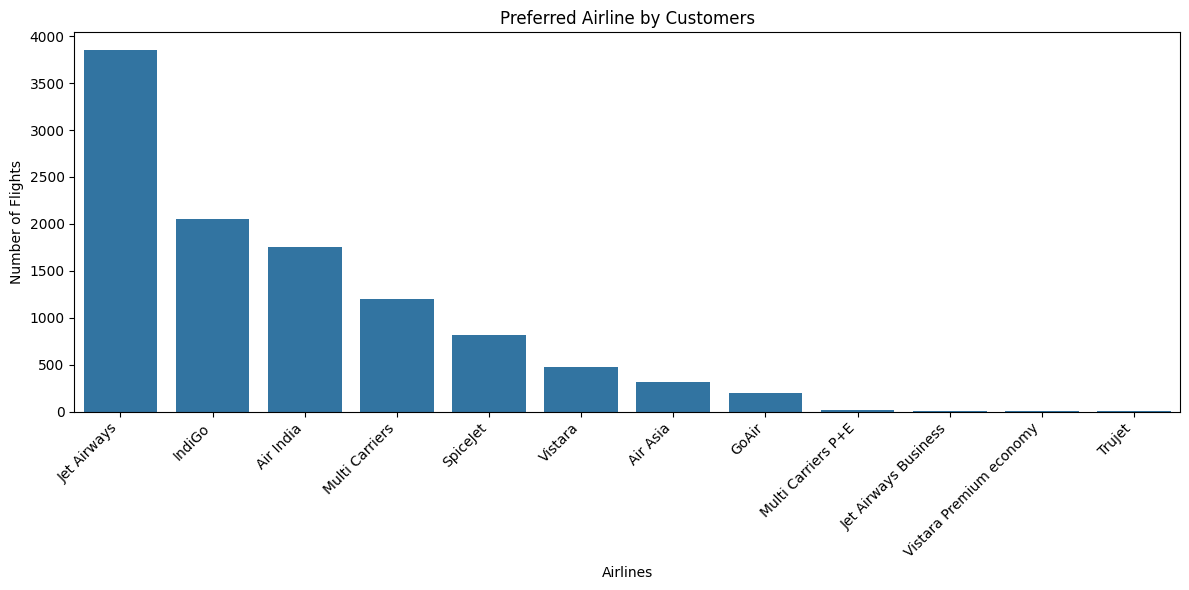

In [95]:

plt.figure(figsize=(12, 6))
carrier_count = df["Airline"].value_counts()
sns.barplot(x=carrier_count.index, y=carrier_count.values)

plt.title('Preferred Airline by Customers')
plt.xlabel('Airlines')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

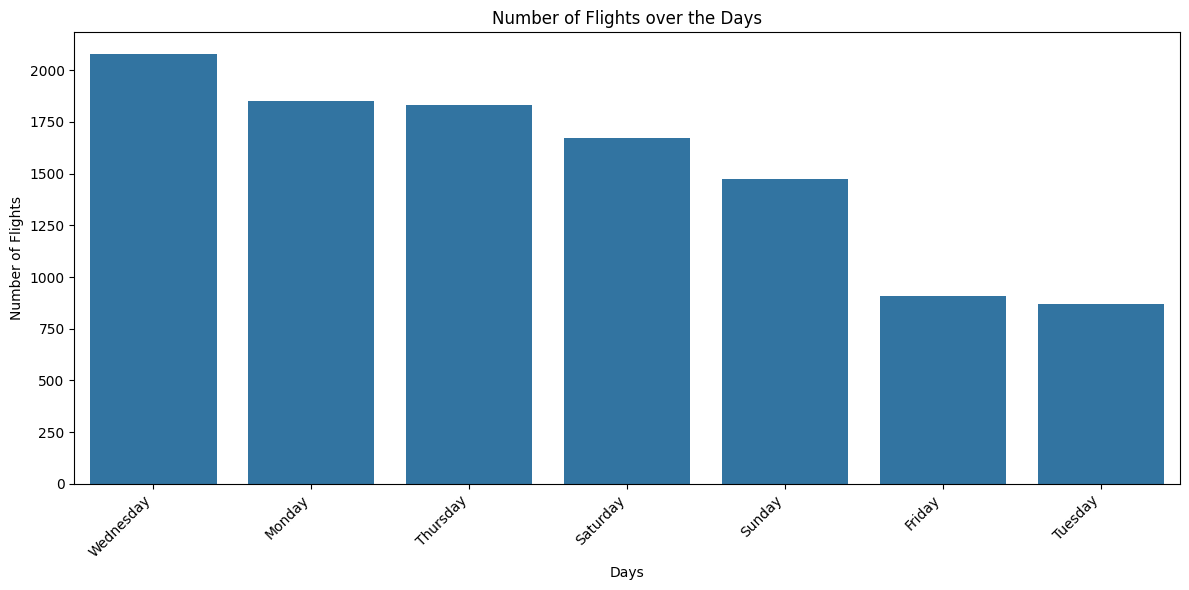

In [96]:
plt.figure(figsize=(12, 6))
carrier_count = df["DoJ_Week"].value_counts()
sns.barplot(x=carrier_count.index, y=carrier_count.values)

plt.title('Number of Flights over the Days')
plt.xlabel('Days')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

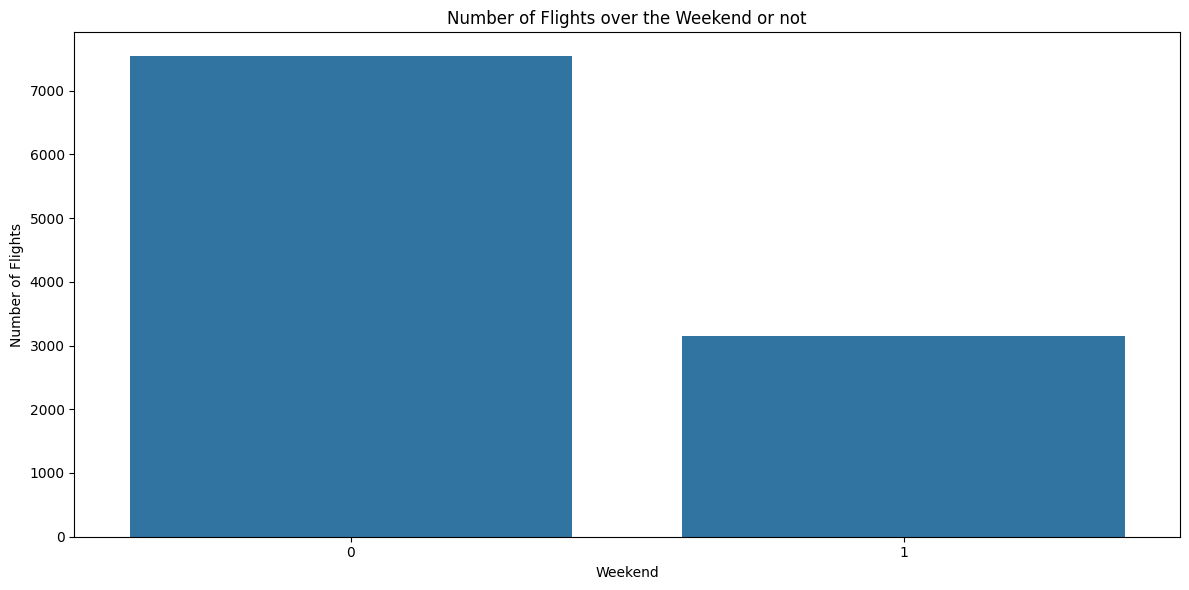

In [97]:
plt.figure(figsize=(12, 6))
carrier_count = df["Weekend"].value_counts()
sns.barplot(x=carrier_count.index, y=carrier_count.values)

plt.title('Number of Flights over the Weekend or not')
plt.xlabel('Weekend')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

In [98]:
# Jet airways has highest number of flights.
# Multi Carriers P+E, Jet Airways Business, Vistara Premium economy and Trujet can be classified as others

In [99]:
df['Airline'] = df['Airline'].map({'Multi Carriers P+E': 'Others', 'Multiple carriers Premium economy': 'Others', 'Jet Airways Business': 'Others', 'Vistara Premium economy': 'Others', 'Trujet': 'Others'}).fillna(df['Airline'])

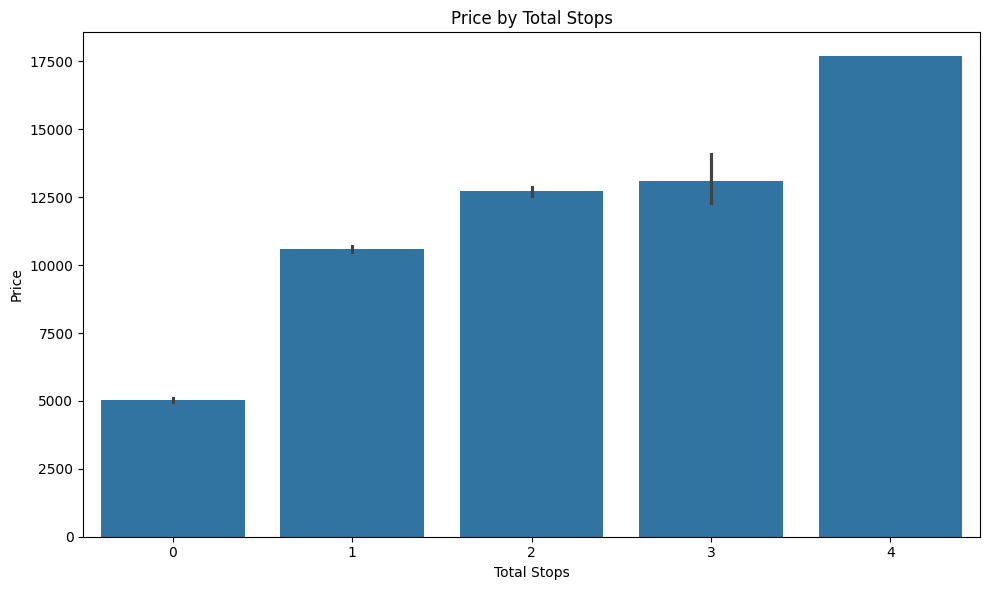

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Total_Stops", y="Price", data=df)

plt.title('Price by Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [101]:
#  Price of flight tickets is higher for flights with greater number of stops

Text(0.5, 1.0, 'Price variation of different airlines')

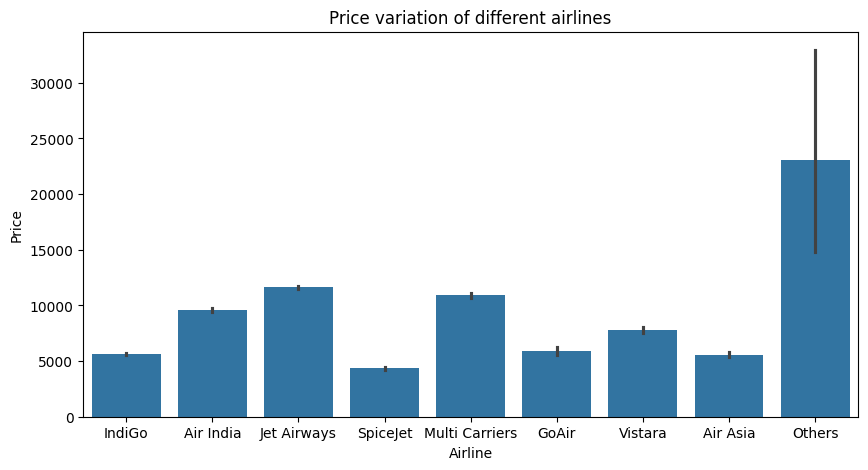

In [102]:
plt.figure(figsize=(10,5)) 
sns.barplot(x="Airline", y="Price", data=df)
plt.title('Price variation of different airlines')

In [103]:
# Seprating numerical and string data
num_df=df.select_dtypes(include=["float64","int32","int64"])
cat_df=df.select_dtypes(include=["object"])

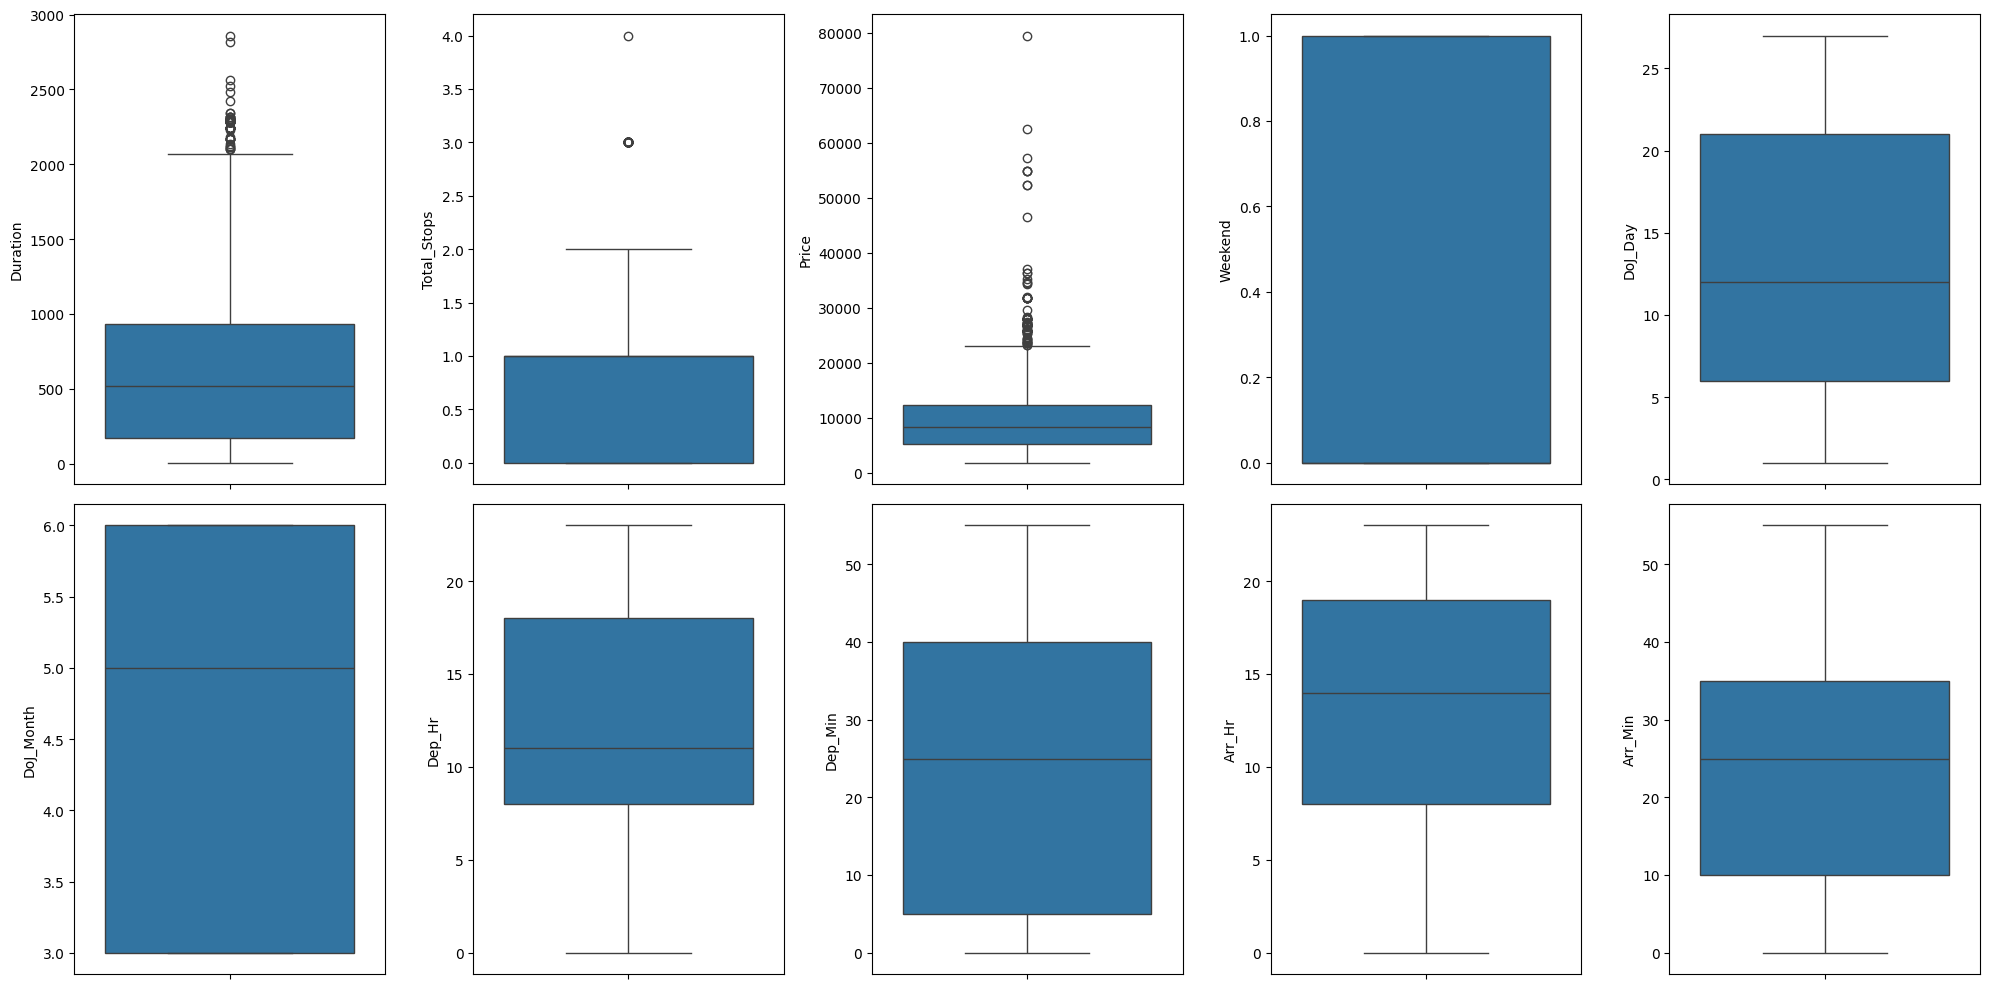

In [104]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

for i, col in enumerate(num_df.columns):
    sns.boxplot(y=num_df[col], ax=ax[i // 5, i % 5])

plt.tight_layout()

In [105]:
q1 = num_df.quantile(0.25)
q3 = num_df.quantile(0.75)
iqr = q3 - q1
    
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
    
clipped_df = num_df.clip(lower_bound, upper_bound, axis=1)
clipped_df = clipped_df.astype(num_df.dtypes)
    
num_df.update(clipped_df)
df.update(clipped_df)

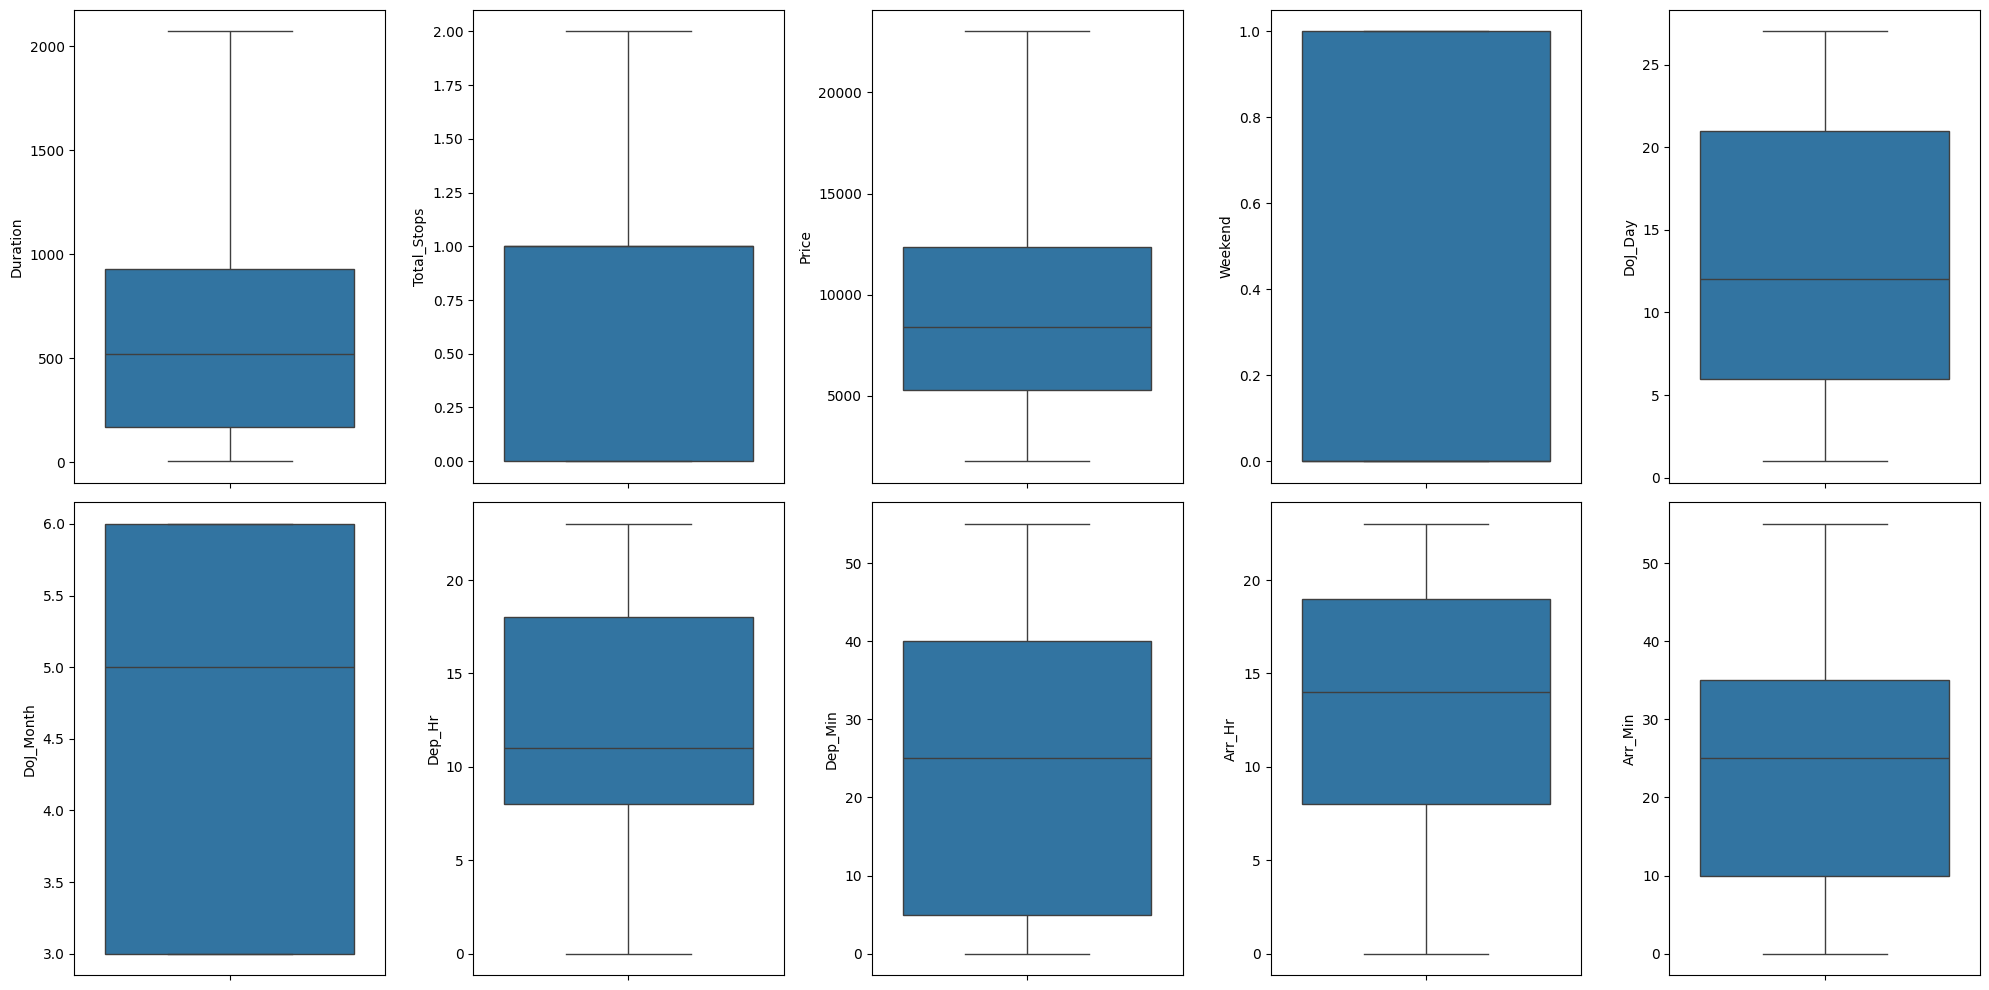

In [106]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

for i, col in enumerate(num_df.columns):
    sns.boxplot(y=num_df[col], ax=ax[i // 5, i % 5])

plt.tight_layout()

In [107]:
le = LabelEncoder()

df['DoJ_Week'] = le.fit_transform(df['DoJ_Week'])

In [108]:
# OneHotEncoding using dummy columns
for column in ['Airline', 'Source', 'Destination']:
    column_encoded = pd.get_dummies(df[[column]], drop_first=True)
    df = pd.concat([df, column_encoded], axis=1)

In [109]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [110]:
df.head()

,Duration,Total_Stops,Price,Weekend,DoJ_Day,DoJ_Week,DoJ_Month,Dep_Hr,Dep_Min,Arr_Hr,...,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897.0,1,24,3,3,22,20,1,...,False,False,False,False,False,False,False,False,False,True
1,445,2,7662.0,0,1,6,5,5,50,13,...,False,False,False,True,False,False,False,False,False,False
2,1140,2,13882.0,1,9,3,6,9,25,4,...,False,False,False,False,False,True,True,False,False,False
3,325,1,6218.0,1,12,3,5,18,5,23,...,False,False,False,True,False,False,False,False,False,False
4,285,1,13302.0,0,1,0,3,16,50,21,...,False,False,False,False,False,False,False,False,False,True


In [111]:
X=df.drop(['Price'], axis=1)
y=df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
#Function to measure different model parameters
def evaluate_model(y_test, y_pred):
    r_squared = metrics.r2_score(y_test, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
    mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
    root_mean_squared_error = np.sqrt(mean_squared_error)
    root_mean_squared_log_error = np.sqrt(mean_squared_log_error(y_test, y_pred))

    print('R Squared (Accuracy):', r_squared)
    print('Mean Absolute Error:', mean_absolute_error)
    print('Mean Squared Error:', mean_squared_error)
    print('Root Mean Squared Error:', root_mean_squared_error)
    print('Root Mean Squared Log Error:', root_mean_squared_log_error)

# Linear Regression

In [113]:
LinReg = LinearRegression()  

LinReg.fit(X_train, y_train)
y_pred_LinReg = LinReg.predict(X_test)

evaluate_model(y_test, y_pred_LinReg)

R Squared (Accuracy): 0.6144115580776469
Mean Absolute Error: 1935.6579313615791
Mean Squared Error: 7192959.479890851
Root Mean Squared Error: 2681.9693286633333
Root Mean Squared Log Error: 0.28698988353962684


# Random Forest

In [114]:
RanFor = RandomForestRegressor()

RanFor.fit(X_train, y_train)
y_pred_RanFor = RanFor.predict(X_test)

evaluate_model(y_test, y_pred_RanFor)

R Squared (Accuracy): 0.8305268597362181
Mean Absolute Error: 1142.368456351375
Mean Squared Error: 3161436.646725831
Root Mean Squared Error: 1778.042926007646
Root Mean Squared Log Error: 0.18083200877767708


# Decision Tree

In [115]:
DecTree = DecisionTreeClassifier()

DecTree.fit(X_train, y_train)
y_pred_DecTree = DecTree.predict(X_test)

evaluate_model(y_test, y_pred_DecTree)

R Squared (Accuracy): 0.6933039379148311
Mean Absolute Error: 1368.8100140383715
Mean Squared Error: 5721261.602714085
Root Mean Squared Error: 2391.9158853760064
Root Mean Squared Log Error: 0.24585826295336477
